In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ../kaisr/

/home/remedios/kaisr/kaisr


In [30]:
import numpy as np
import nibabel as nib
from pathlib import Path
from utils.plot import *
from resize.scipy import resize
from skimage.metrics import peak_signal_noise_ratio

In [11]:
set_display_mode('dark')

In [14]:
figsize = (36, 18)

In [50]:
fwhm = 2
gap = 0

In [51]:
gt_fpath = Path(f"/home/remedios/ssr_phantoms/isotropic_frequency_phantom.nii.gz")
lr_fpath = Path(f"/home/remedios/data/freq_phantom/freq_phantom_{fwhm:02d}x_{gap:02d}gap_aniso/isotropic_frequency_phantom.nii.gz")
sr_fpath = Path(f"/home/remedios/data/results/freq_phantom/{fwhm:02d}x_{gap:02d}gap/isotropic_frequency_phantom/isotropic_frequency_phantom_smore3.nii.gz")

In [52]:
gt = nib.load(gt_fpath).get_fdata()
lr = nib.load(lr_fpath).get_fdata()
sr = nib.load(sr_fpath).get_fdata()

In [53]:
# interpolate
it = resize(lr, (1, 1, 1 / fwhm), order=3, same_fov=False, target_shape=gt.shape)
nn = resize(lr, (1, 1, 1 / fwhm), order=0, same_fov=False, target_shape=gt.shape)

In [55]:
data_range = gt.max() - gt.min()

psnr_nn = peak_signal_noise_ratio(nn, gt, data_range=data_range)
psnr_it = peak_signal_noise_ratio(it, gt, data_range=data_range)
psnr_sr = peak_signal_noise_ratio(sr, gt, data_range=data_range)

In [56]:
psnr_nn

53.69248291004094

In [57]:
psnr_it

54.33890834606554

In [58]:
psnr_sr

29.69832758342481

In [59]:
gt.shape, lr.shape, sr.shape

((256, 256, 256), (256, 256, 128), (256, 256, 256))

In [65]:
lr.min(), lr.max()

(3.235897747799754e-05, 0.9812111854553223)

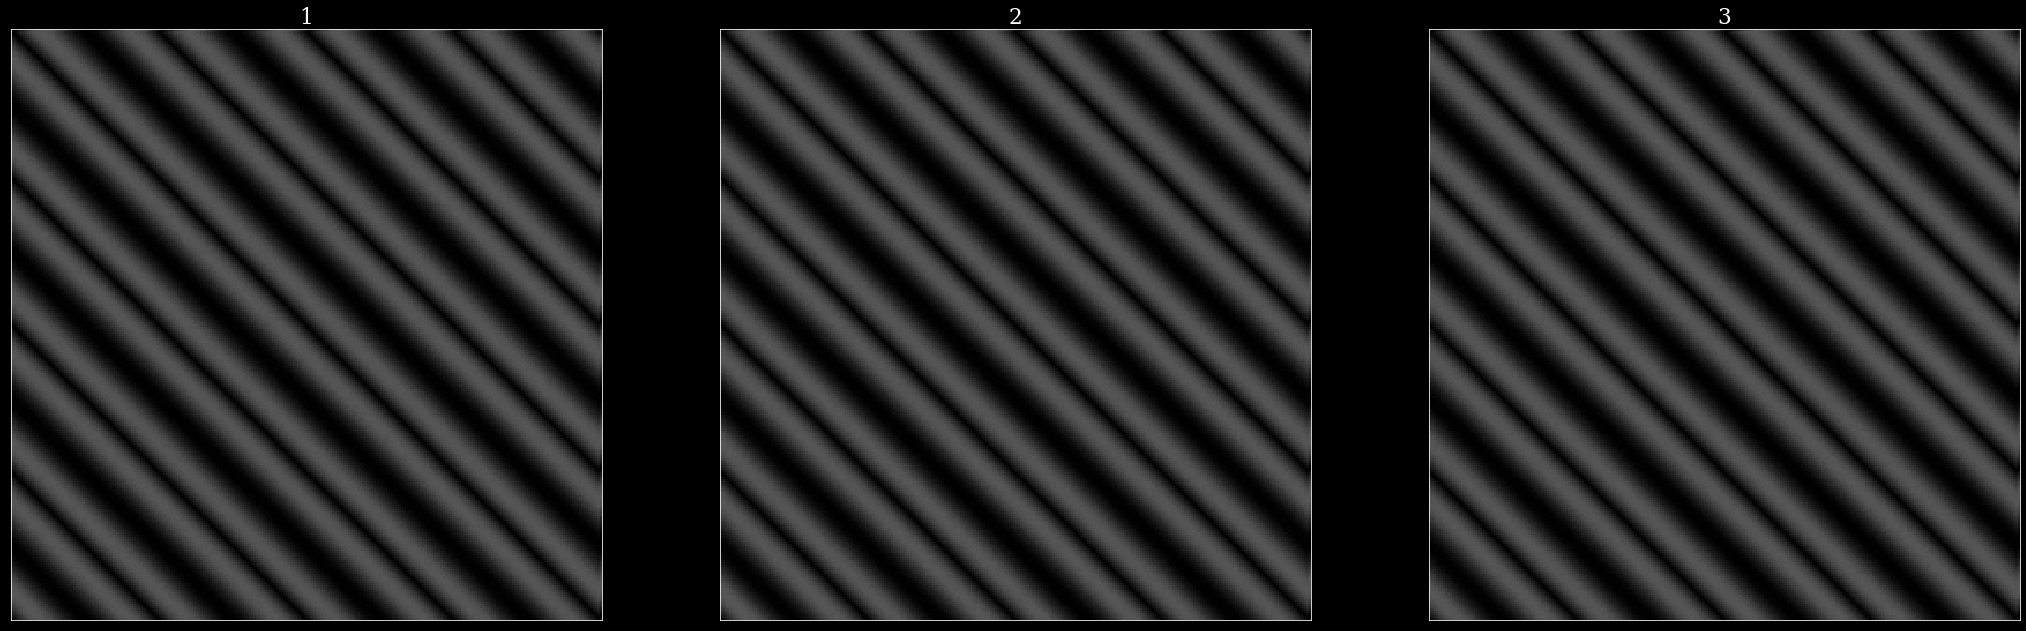

In [60]:
center_vol_plot(gt, vmax=0.05*gt.max(), figsize=figsize)

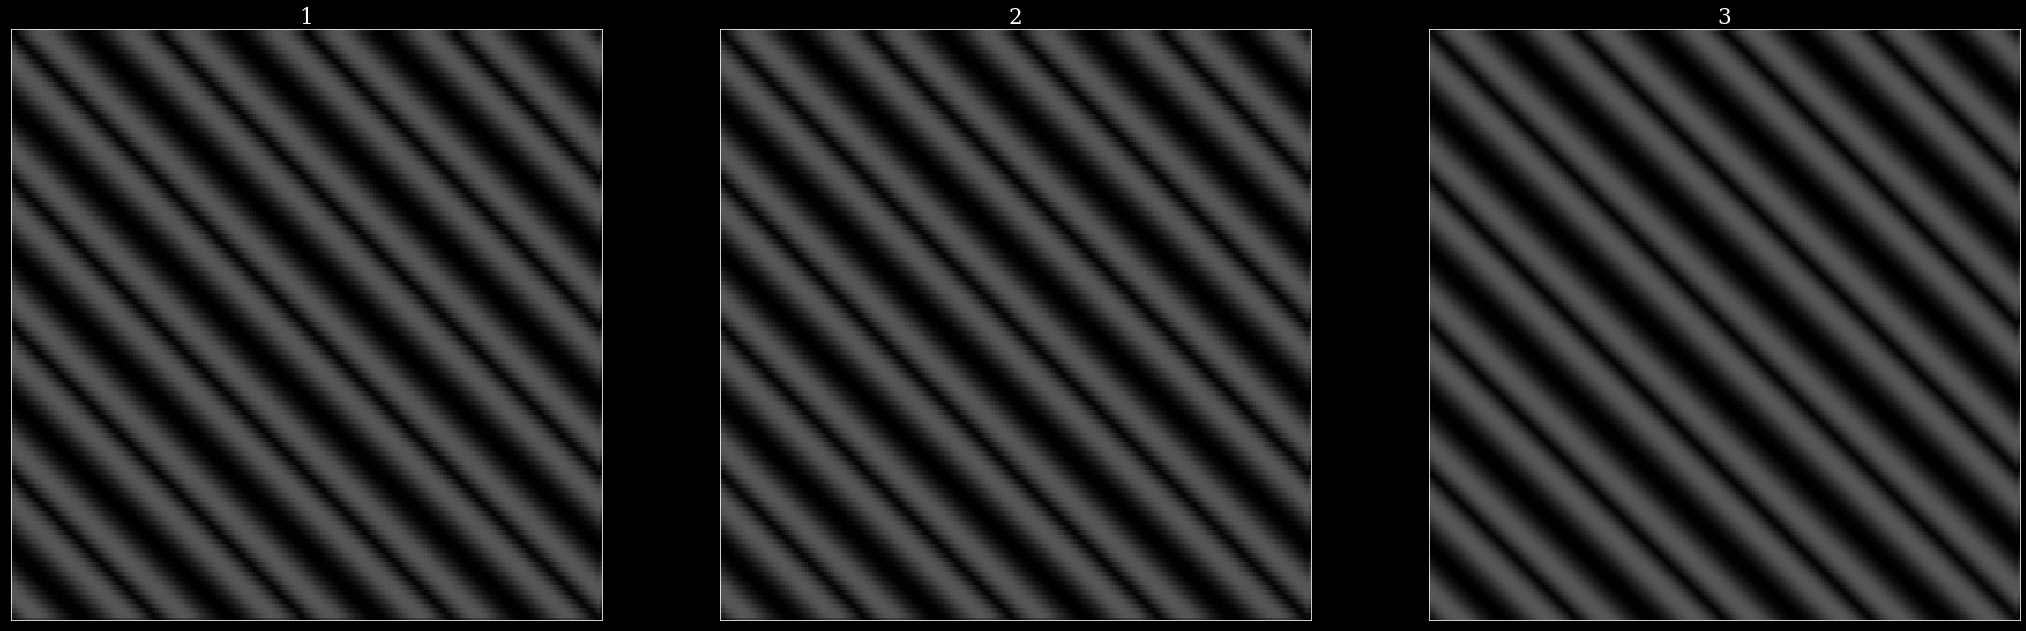

In [61]:
center_vol_plot(nn, vmax=0.05*lr.max(), figsize=figsize)

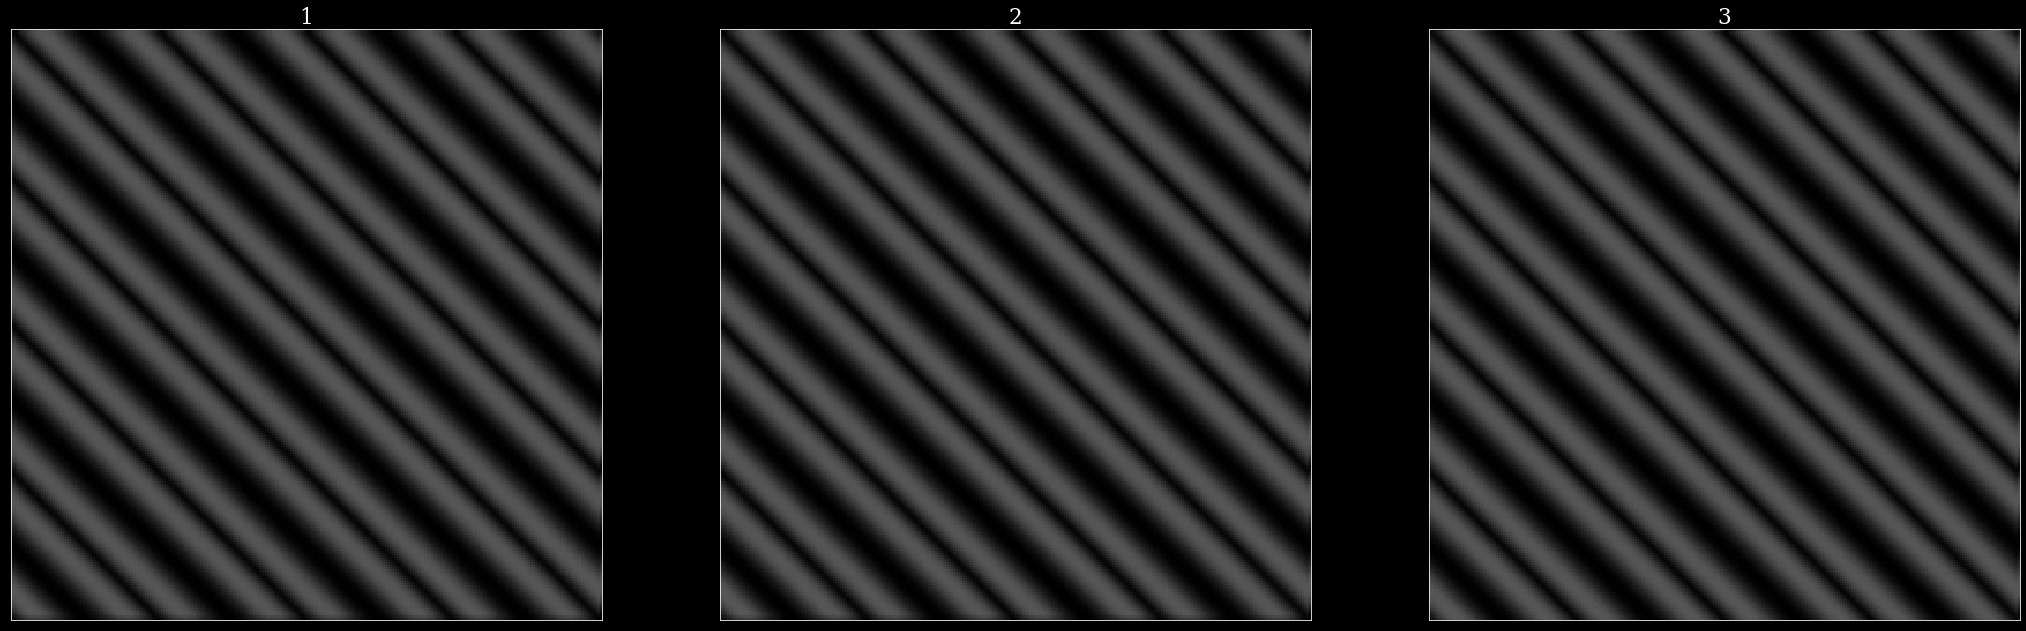

In [62]:
center_vol_plot(it, vmax=0.05*it.max(), figsize=figsize)

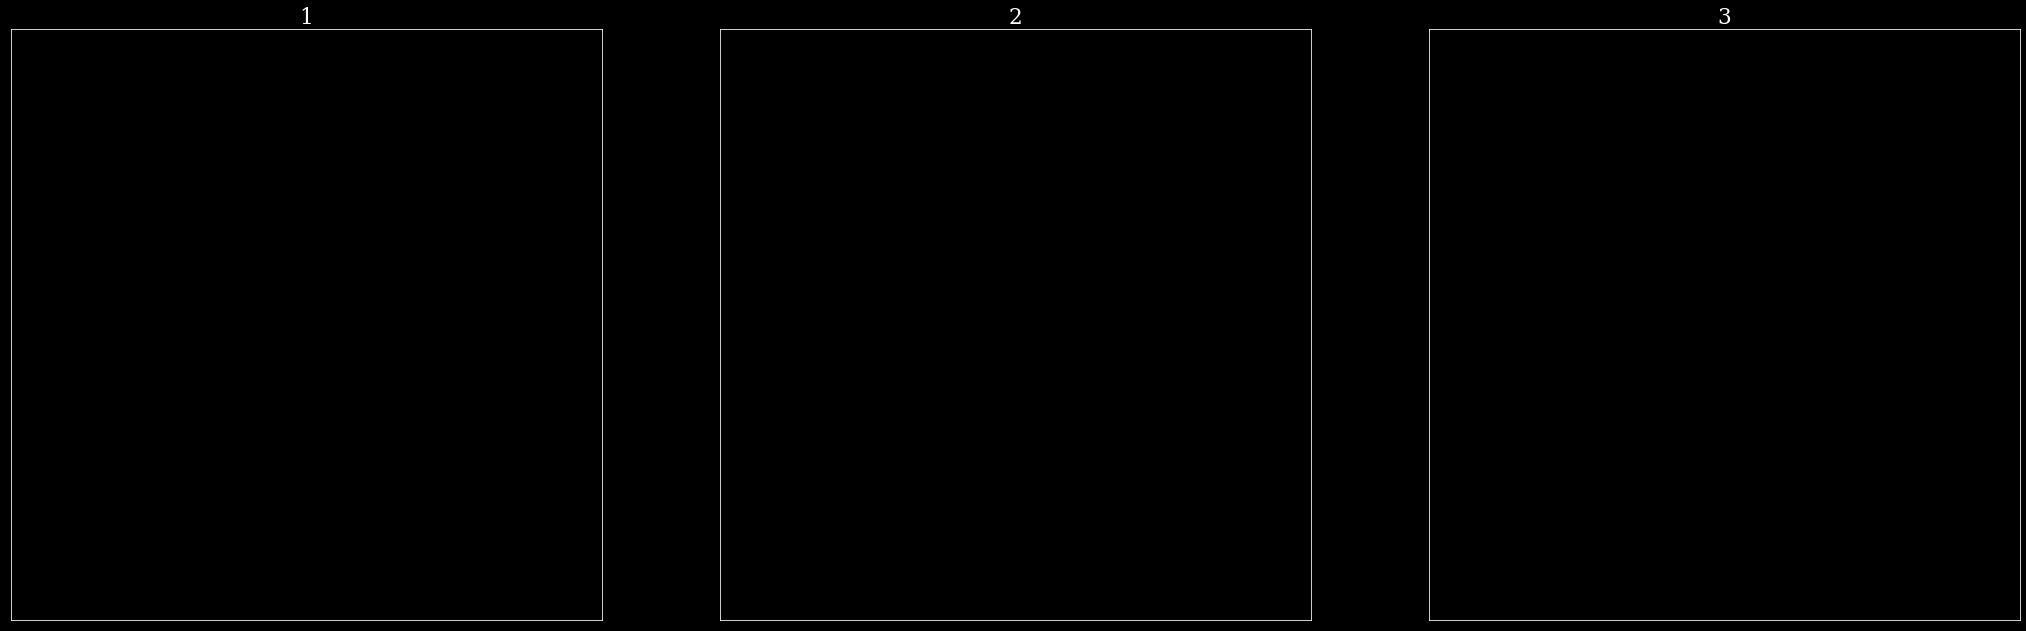

In [63]:
center_vol_plot(sr, figsize=figsize)

In [64]:
sr.min(), sr.max()

(4.646519300877117e-06, 4.646519300877117e-06)